n_sample =  32


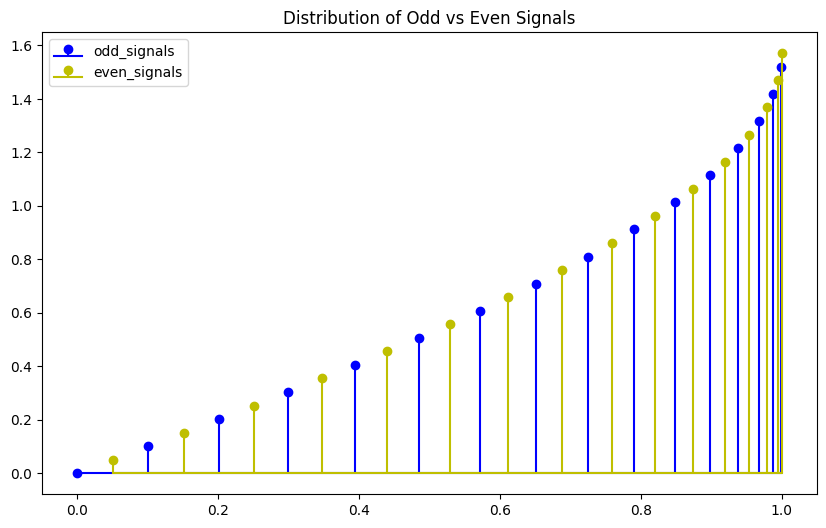

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt_figsize = (10,6)
n_sample = 2**5
print('n_sample = ', n_sample)
theta = np.linspace(0, np.pi / 2, num=n_sample)
sine_data = np.sin(theta)

theta_odd = theta[0::2]
sine_odd = sine_data[0::2]

theta_even = theta[1::2]
sine_even = sine_data[1::2]

plt.figure(figsize=plt_figsize)
plt.stem(sine_odd, theta_odd, linefmt='b-', basefmt='b-', label='odd_signals')
plt.stem(sine_even, theta_even, linefmt='y-', basefmt='y-', label='even_signals')
plt.legend()

plt.title('Distribution of Odd vs Even Signals')
plt.show()

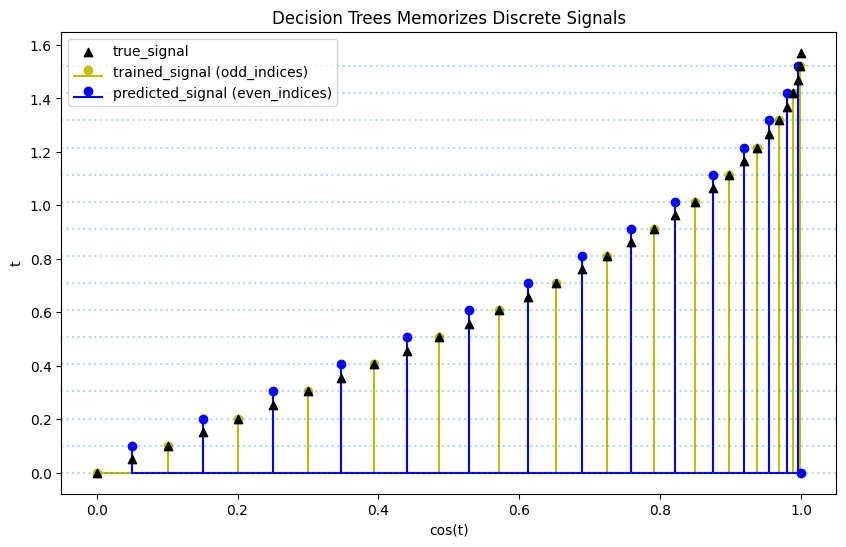

In [19]:
class NaiveIDDecisionTreeRegressor:

    def fit(self, X, y):
        self.thresholds = np.unique(X.reshape(-1))
        self.leaves_preds = np.unique(y.reshape(-1))

    def predict(self, X):
        region_per_sample = (X <= self.thresholds).astype(np.int32)
        regions_indices = np.argmax(region_per_sample, axis=1)
        preds = self.leaves_preds[regions_indices]
        return preds
    
def train_plot_decision_tree(x, x_train, x_test, y, y_train, train_label, test_label):
    tree_model = NaiveIDDecisionTreeRegressor()

    tree_model.fit(x_train.reshape(-1,1), y_train)
    y_pred = tree_model.predict(x_test.reshape(-1,1))

    plt.figure(figsize=plt_figsize)
    plt.stem(x_train, y_train, linefmt='y-', basefmt='y-', label=f'trained_signal ({train_label})')
    plt.stem(x_test, y_pred, linefmt='b-', basefmt='b-', label=f'predicted_signal ({test_label})')
    plt.scatter(x, y, color='black', label='true_signal', marker='^', zorder=2)
    plt.legend()

    for i in range(0, y_pred.shape[0]):
        plt.axhline(y_train[i], linestyle='dotted', alpha=0.3)

    plt.title('Decision Trees Memorizes Discrete Signals')
    plt.xlabel('cos(t)')
    plt.ylabel('t')
    plt.show()


train_plot_decision_tree(sine_data, sine_odd, sine_even, theta, theta_odd, 'odd_indices', 'even_indices')

        
         